# BucketBatchSampler Example

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys

home_dir = os.path.expanduser('~')
sys.path.append("{}/dev/github/ml-toolkit".format(home_dir))

In [3]:
import numpy as np

## Toy Example

### Generate Example Data

In [4]:
data = [('one two three four', 'eins zwei drei vier'),
        ('one two three four', 'eins zwei drei vier'),
        ('one two three four', 'eins zwei drei vier'),
        ('one two three four', 'eins zwei drei vier'),
        ('one two three four', 'eins zwei drei vier'),
        ('one two three four', 'eins zwei drei vier'),
        ('one two three four', 'eins zwei drei'),
        ('one two three four', 'eins zwei drei'),
        ('one two three four', 'eins zwei drei'),
        ('one two three four', 'eins zwei drei vier fuenf'),
        ('one two three four', 'eins zwei drei vier fuenf'),
        ('one two three', 'eins zwei drei vier'),
        ('one two three', 'eins zwei drei'),
        ('one two three', 'eins zwei drei'),
        ('one two three', 'eins zwei drei'),
        ('one two three', 'eins zwei drei'),
        ('one two three', 'eins zwei drei'),
        ('one two three', 'eins zwei drei'),
        ('one two three', 'eins zwei drei'),
        ('one two three', 'eins zwei drei'),
        ('one two three', 'eins zwei drei'),
        ('one two three', 'eins zwei drei vier fuenf')
       ]

print("Number of data items: {}".format(len(data)))

Number of data items: 22


In [5]:
inputs = [ tup[0] for tup in data ]
targets = [ tup[1] for tup in data ]

### Vectorize Data

**IMPORTANT:** For a traditional machine translation tasks with two different vocabularies, one should use two vectorizers, one for each language. Here it doesn't matter, since we're only interested in the shape of the batches.

In [6]:
from pytorch.utils.data.text.vectorizer import Vectorizer

In [7]:
# Method fit_on_texts expects a list of strings, so we need to merge the tuples forist
text_list = [ "{} {}".format(tup[0], tup[1]) for tup in data ]

vectorizer = Vectorizer()
vectorizer.fit_on_texts(text_list)

print(vectorizer.vocabulary.word_to_index)

{'one': 0, 'two': 1, 'three': 2, 'eins': 3, 'zwei': 4, 'drei': 5, 'four': 6, 'vier': 7, 'fuenf': 8}


In [8]:
inputs_vectorized, _ = vectorizer.texts_to_sequences(inputs)
targets_vectorized, _ = vectorizer.texts_to_sequences(targets)

print(inputs_vectorized)

[array([0, 1, 2, 6]) array([0, 1, 2, 6]) array([0, 1, 2, 6])
 array([0, 1, 2, 6]) array([0, 1, 2, 6]) array([0, 1, 2, 6])
 array([0, 1, 2, 6]) array([0, 1, 2, 6]) array([0, 1, 2, 6])
 array([0, 1, 2, 6]) array([0, 1, 2, 6]) array([0, 1, 2]) array([0, 1, 2])
 array([0, 1, 2]) array([0, 1, 2]) array([0, 1, 2]) array([0, 1, 2])
 array([0, 1, 2]) array([0, 1, 2]) array([0, 1, 2]) array([0, 1, 2])
 array([0, 1, 2])]


### Create Data Generator

In [10]:
batch_size = 5

In [23]:
from torch.utils.data import DataLoader
from pytorch.utils.data.text.dataset import BucketBatchSampler, BucketDataset

bucket_batch_sampler = BucketBatchSampler(batch_size, inputs_vectorized, targets_vectorized)
# In case targets=None    
#bucket_batch_sampler = BucketBatchSampler(batch_size, inputs_vectorized, None)

bucket_dataset = BucketDataset(inputs_vectorized, targets_vectorized)
# In case targets=None    
#bucket_dataset = BucketDataset(inputs_vectorized, None)

data_iter = DataLoader(bucket_dataset,batch_sampler=bucket_batch_sampler, shuffle=False, num_workers=6, drop_last=False)

print("Number of batches: {}".format(data_iter.batch_sampler.batch_count()))

Number of batches: 8


In [24]:
for batch_inputs, batch_targets in data_iter:
    print("++++++++++++++++++++")
    print(batch_inputs)
    print(batch_targets)
    
# In case targets=None    
#for batch_inputs in data_iter:
#    print("++++++++++++++++++++")
#    print(batch_inputs)


++++++++++++++++++++
tensor([[0, 1, 2, 6],
        [0, 1, 2, 6],
        [0, 1, 2, 6],
        [0, 1, 2, 6],
        [0, 1, 2, 6]])
tensor([[3, 4, 5, 7],
        [3, 4, 5, 7],
        [3, 4, 5, 7],
        [3, 4, 5, 7],
        [3, 4, 5, 7]])
++++++++++++++++++++
tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])
tensor([[3, 4, 5],
        [3, 4, 5],
        [3, 4, 5],
        [3, 4, 5],
        [3, 4, 5]])
++++++++++++++++++++
tensor([[0, 1, 2]])
tensor([[3, 4, 5, 7, 8]])
++++++++++++++++++++
tensor([[0, 1, 2, 6]])
tensor([[3, 4, 5, 7]])
++++++++++++++++++++
tensor([[0, 1, 2, 6],
        [0, 1, 2, 6],
        [0, 1, 2, 6]])
tensor([[3, 4, 5],
        [3, 4, 5],
        [3, 4, 5]])
++++++++++++++++++++
tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])
tensor([[3, 4, 5],
        [3, 4, 5],
        [3, 4, 5],
        [3, 4, 5]])
++++++++++++++++++++
tensor([[0, 1, 2, 6],
        [0, 1, 2, 6]])
tensor([[3, 4, 5, 7, 8]

## Real-World Example

Link to dataset: http://www.isi.edu/natural-language/download/hansard/hansard.36.r2001-1a.house.debates.training.tar

(for the test, I considered only the first 1 Million lines in each file)

### Load Data

In [25]:
data = []

cnt = 0
with open("train.de.sample") as f1, open("train.en.sample") as f2: 
    for x, y in zip(f1, f2):
        x = x.strip()
        y = y.strip()
        #print("{0}\t{1}".format(x, y))
        data.append((x, y))
        cnt += 1
        if cnt % 1000000 == 0:
            print("{} done".format(cnt))
        
print(len(data))

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa53dbfdd30>>
Traceback (most recent call last):
  File "/home/vdw/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/home/vdw/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/home/vdw/env/anaconda3/envs/py36/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/home/vdw/env/anaconda3/envs/py36/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/home/vdw/env/anaconda3/envs/py36/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


1000000 done
1000000


In [26]:
print(data[0])

('iron cement ist eine gebrauchs ##AT##-##AT## fertige Paste , die mit einem Spachtel oder den Fingern als Hohlkehle in die Formecken ( Winkel ) der Stahlguss -Kokille aufgetragen wird .', 'iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges ( corners ) of the steel ingot mould .')


### Vectorize Data

**IMPORTANT:** For a traditional machine translation tasks with two different vocabularies, one should use two vectorizers, one for each language. Here it doesn't matter, since we're only interested in the shape of the batches.

In [27]:
from pytorch.utils.data.text.vectorizer import Vectorizer

In [29]:
# Method fit_on_texts expects a list of strings, so we need to merge the tuples forist
text_list = [ "{} {}".format(tup[0], tup[1]) for tup in data ]

# In a real setting, you typically want to reserve some default tokens
vectorizer = Vectorizer(default_indexes={0: '<pad>', 1: '<unk>', 2: '<sos>', 3: '<eos>'})
vectorizer.fit_on_texts(text_list)

# We don't need this anyore => make some room in the memory
text_list = None

In [30]:
inputs = [ tup[0] for tup in data ]
targets = [ tup[1] for tup in data ]

inputs_vectorized, _ = vectorizer.texts_to_sequences(inputs, padding_idx=0, unknown_idx=1)
targets_vectorized, _ = vectorizer.texts_to_sequences(targets, padding_idx=0, unknown_idx=1)

print(inputs_vectorized)
print(len(inputs_vectorized))

[array([  5651,  25122,     29,     44, 486259,     11,  28715,  26681,
            4,     15,     25,     87, 172118,     55,     28,  40513,
           73, 486260,      7,     15, 486261,     17,  16130,     18,
           13, 262353, 486262,  43090,     76,      5])
 array([   588,     13, 322259,  10322,   5651,  25122,     15, 262354,
          450,     28,  23841,      4, 262355, 262353,      5])
 array([262356, 486263,     35, 486264,      4,  59463,      4,   7832,
       144743,   1560])
 ...
 array([  2223,    187,    299,     41,  12492,     32,      6,   1369,
           12,  21886,     14,   3109,   1237,      9,    187,   3997,
          413,   1599,     27,    191, 486258,   3327,    456,     21,
         5009,   1390,   6894,      5])
 array([ 9368, 15797,   371, 10130,   452,  1358, 74060,    14,   691,
        8271,   371, 10130, 12492, 19053,   165,  2722,    79,  8081,
        1191, 26575,  9332, 19923,    79,  1786,   413,  1599,  2146,
         122,  3424,     4, 

### Create Data Generator

In [31]:
batch_size = 32

In [32]:
from torch.utils.data import DataLoader
from pytorch.utils.data.text.dataset import BucketBatchSampler, BucketDataset

bucket_batch_sampler = BucketBatchSampler(batch_size, inputs_vectorized, targets_vectorized)

bucket_dataset = BucketDataset(inputs_vectorized, targets_vectorized)

data_iter = DataLoader(bucket_dataset,batch_sampler=bucket_batch_sampler, shuffle=False, num_workers=6, drop_last=False)

print("Number of batches: {}".format(data_iter.batch_sampler.batch_count()))

Number of batches: 36705


In [33]:
print(len(bucket_batch_sampler))

1000000


In [34]:
batch_sizes = {}

for batch_input, batch_target in data_iter:
    batch_size = batch_input.shape[0]
    if batch_size in batch_sizes:
        batch_sizes[batch_size] += 1
    else:
        batch_sizes[batch_size] = 1


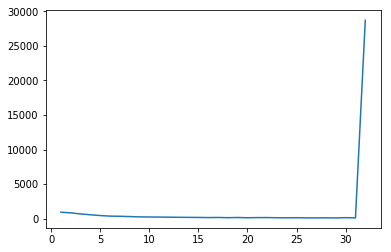

In [39]:
import matplotlib.pylab as plt

lists = sorted(batch_sizes.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.savefig('bucketbatchsample-batch-size-distribution.png')
plt.show()
